My friends,\
It is\
Time to code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# original speed dating dataframe
df = pd.read_csv("SpeedDatingData.csv",encoding = "ISO-8859-1"); 

## Goal: create a dataframe indexed by unique people

In [4]:
## I needed gender so I simplified here as well.
people = df.groupby('iid')[['gender', 'imprelig']].first()
people['imprelig'] = (people['imprelig'].fillna(0) >= 6).astype(int)


In [4]:
# initializing people df
# people = pd.DataFrame(df["iid"].unique())
# people = people.rename(columns={0:"iid"})

### Variable: importance of religion to people (binary)

In [5]:
# obtaining importance of religion from speed dating df
# NOTE: we replace na values with zero because someone's failure to note the importance of 
#       religion to them in dating suggests religion is not important to them to beign with
#imp_relig_iids = np.array(df[["iid","imprelig"]].fillna(0).groupby("iid").mean()["imprelig"])

In [6]:
#people["imprelig"] = imp_relig_iids
# making imprelig a binary variable: religion is important to this person if imprelig >= 6
#people["imprelig"] = np.array(people["imprelig"] >= 6).astype(int)

### Variable: religion of each person (one hot encoded)

Synthesizing religion data for each person based on religion distributions from U.S. demographic data

In [38]:
np.random.seed(42) 
religions = np.random.choice(
    a=["Protestant","Catholic","Mormon","Unaffiliated","Atheist",
        "Agnostic","Jewish","Muslim","Hindu","Buddhist"],
    size=551,
    # religious preference distribution obtained from wikipedia
    p=[0.42,0.21,0.02,0.18,0.06,0.07,0.01,0.01,0.01,0.01]  
)

In [39]:
people["Religion"] = religions

In [40]:
people['Religion'].value_counts().index.to_list()

['Protestant',
 'Catholic',
 'Unaffiliated',
 'Agnostic',
 'Atheist',
 'Mormon',
 'Jewish',
 'Hindu',
 'Buddhist',
 'Muslim']

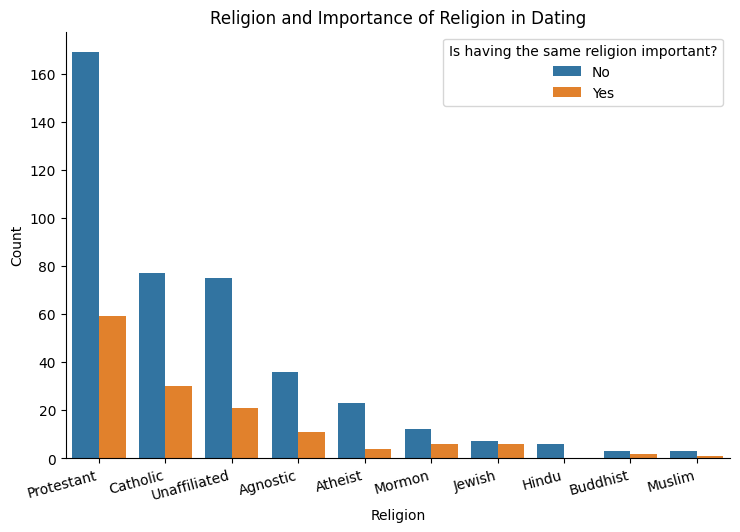

In [47]:
g = sns.catplot(data=people, x="Religion", hue="imprelig", kind="count", height=5, aspect=1.5, legend=False, order=people['Religion'].value_counts().index.to_list())

#change the labels


#tilt the x labels with left alignment
plt.xticks(rotation=15, horizontalalignment="right")

plt.legend(title="Is having the same religion important?", labels=["No", "Yes"])

g.set_axis_labels("Religion", "Count")
plt.title("Religion and Importance of Religion in Dating")

plt.show()

One hot encoding

In [15]:
people_r = pd.get_dummies(people.religion)
people = pd.concat([people, people_r], axis= 1)
people = people.drop('religion', axis=1);

In [16]:
people.head()

,gender,imprelig,agnostic,atheist,buddhist,catholic,hindu,jewish,mormon,muslim,protestant,unaffiliated
iid,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
# exporting df to csv
people.to_csv("people.csv")